Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [179]:
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [180]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [181]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [182]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [183]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [184]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()\
    
    else: # exploit
        action = np.argmax(Q[state])\
        
    return action

Ejemplo de episodio 

In [185]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    print('->', state, action, reward, obs, done)
    env.render()
print('total_reward', total_reward)
print('total_steps', step_count)

371
-> 371 0 -1 471 False
-> 471 4 -10 471 False
-> 471 3 -1 471 False
-> 471 2 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 4 -10 491 False
-> 491 5 -10 491 False
-> 491 0 -1 491 False
-> 491 5 -10 491 False
-> 491 1 -1 391 False
-> 391 0 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 1 -1 391 False
-> 391 4 -10 391 False
-> 391 0 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 0 -1 491 False
-> 491 5 -10 491 False
-> 491 3 -1 471 False
-> 471 0 -1 471 False
-> 471 4 -10 471 False
-> 471 0 -1 471 False
-> 471 0 -1 471 False
-> 471 3 -1 471 False
-> 471 0 -1 471 False
-> 471 3 -1 471 False
-> 471 0 -1 471 False
-> 471 3 -1 471 False
-> 471 1 -1 371 False
-> 371 2 -1 391 False
-> 391 3 -1 371 False
-> 371 0 -1 471 False
-> 471 5 -10 471 False
-> 471 0 -1 471 False
-> 471 3 -1 471 False
-> 471 5 -10 471 False
-> 471 2 -1 491 False
-> 491 2 -1 491 False
-> 491 0 -1 491 Fal

Generar muchos episodios

In [186]:
max_steps = env.max_steps
max_steps

200

In [187]:
episodes = 20000

In [188]:
alpha=1 / (max_steps+1)
alpha

0.004975124378109453

In [189]:
gamma = 0.9

In [190]:
rewards = []
steps = []

In [191]:
i = 0
success = 0
while i< episodes:
    
    total_reward = 0    
    step_count = 0
    obs, _ = env.reset()
    done=False
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q, 0.1)
        obs, reward, done, _, _ = env.step(action)
        
        total_reward += reward
        step_count += 1
        if (reward ==20):
            print(total_reward, step_count)
            success+=1
                      
        value = Q[state][action] + alpha*(reward + gamma*np.max(Q[obs]) - Q[state][action])
        Q[state][action] = value
    
    rewards.append(total_reward)
    steps.append(step_count)
    if(i%1000 == 0):
        print(i, " of ", episodes, " Episodes")
    i=i+1
print(success)

0  of  20000  Episodes
-215 101
-239 116
-493 199
-321 189
-172 157
-113 98
-241 172
-151 82
-258 189
-149 152
-102 105
-19 22
-49 43
-93 78
-80 83
-226 184
-16 37
-80 83
-160 145
-81 75
-267 171
-93 69
-177 153
-239 197
-168 135
-107 119
-147 123
-202 133
-16 28
-188 164
-29 41
-95 98
-224 146
-123 126
-165 141
-53 56
-279 183
-171 165
-192 159
-164 140
-321 198
-101 50
-217 193
-11 14
-199 157
-71 47
-249 189
-184 178
-171 102
-40 43
-253 175
-175 133
-234 192
-207 156
-152 128
-182 149
-99 75
-151 127
-183 141
-107 101
-28 49
-8 20
-60 72
-227 176
-103 88
-240 198
-266 197
-218 185
-232 199
-113 98
-225 183
-31 34
-73 94
-329 197
-161 146
-91 67
-18 39
-157 124
-61 82
-164 158
-106 100
-42 63
-198 138
-114 90
-247 178
-249 189
-144 129
-161 146
-149 152
-194 143
-87 63
-216 192
-44 56
-95 80
-114 99
-262 166
-133 127
-269 191
-8 29
-226 175
-234 174
-223 172
-154 112
-191 158
-215 164
-124 82
-124 109
-193 160
-248 197
-177 144
-89 92
-170 119
-177 153
-166 115
-143 137
-210 150
-26

In [192]:
print(success/episodes*100, '%')

84.49 %


In [193]:
rewards

[-515,
 -614,
 -443,
 -569,
 -551,
 -578,
 -416,
 -515,
 -515,
 -578,
 -452,
 -362,
 -596,
 -380,
 -215,
 -389,
 -353,
 -344,
 -398,
 -416,
 -542,
 -263,
 -623,
 -239,
 -245,
 -398,
 -493,
 -263,
 -596,
 -281,
 -321,
 -281,
 -380,
 -281,
 -263,
 -281,
 -272,
 -299,
 -578,
 -254,
 -299,
 -236,
 -227,
 -172,
 -245,
 -281,
 -308,
 -272,
 -227,
 -236,
 -113,
 -245,
 -241,
 -290,
 -290,
 -151,
 -425,
 -245,
 -209,
 -263,
 -317,
 -299,
 -281,
 -258,
 -254,
 -263,
 -227,
 -149,
 -308,
 -254,
 -299,
 -308,
 -380,
 -335,
 -371,
 -317,
 -281,
 -102,
 -299,
 -407,
 -290,
 -19,
 -371,
 -263,
 -272,
 -281,
 -281,
 -272,
 -227,
 -227,
 -49,
 -317,
 -317,
 -281,
 -353,
 -245,
 -317,
 -254,
 -425,
 -245,
 -272,
 -317,
 -281,
 -263,
 -272,
 -362,
 -299,
 -254,
 -281,
 -407,
 -245,
 -308,
 -93,
 -227,
 -263,
 -245,
 -290,
 -254,
 -281,
 -80,
 -254,
 -380,
 -299,
 -272,
 -353,
 -245,
 -326,
 -371,
 -344,
 -245,
 -245,
 -281,
 -227,
 -226,
 -290,
 -371,
 -245,
 -326,
 -16,
 -281,
 -281,
 -299,
 -281,
 -80

In [194]:
steps

[200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 101,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 116,
 200,
 200,
 199,
 200,
 200,
 200,
 189,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 157,
 200,
 200,
 200,
 200,
 200,
 200,
 98,
 200,
 172,
 200,
 200,
 82,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 189,
 200,
 200,
 200,
 152,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 105,
 200,
 200,
 200,
 22,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 43,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 78,
 200,
 200,
 200,
 200,
 200,
 200,
 83,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 184,
 200,
 200,
 200,
 200,
 37,
 200,
 200,
 200,
 200,
 83,
 200,
 200,
 200,
 200,
 200,
 200,
 145,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 75,
 200,
 200,
 200,
 200,
 200,
 200,
 

In [195]:
import matplotlib.pyplot as plt


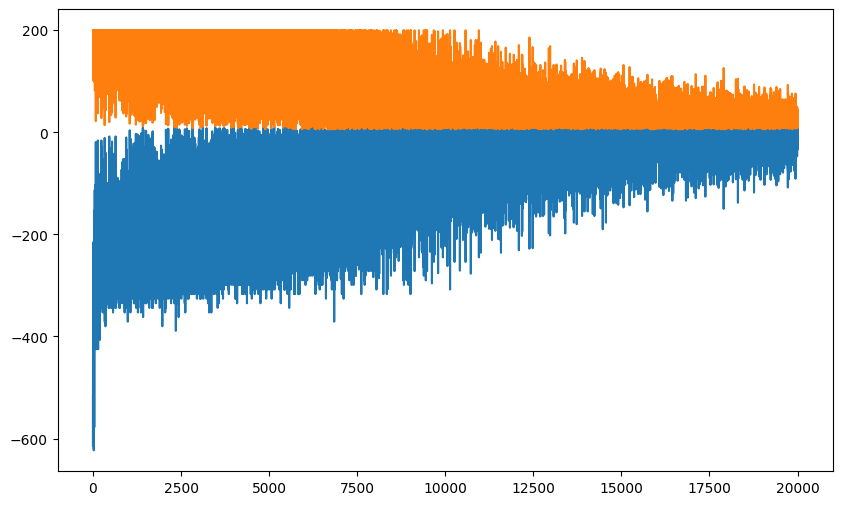

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [198]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-3.14010486, -3.08838237, -3.14834858, -3.03432171, -0.13994823,
        -4.47352192],
       [-1.48815784, -1.20509808, -1.69239808, -1.2477364 ,  7.13711804,
        -2.29057181],
       ...,
       [-0.7974001 , -0.55019145, -0.80181961, -0.80156317, -0.84046668,
        -0.83471924],
       [-2.2098692 , -2.20322963, -2.20964207, -2.00875449, -2.29859341,
        -2.20842885],
       [-0.02485088, -0.03009897, -0.01064169,  5.22971424, -0.26229882,
        -0.21378728]])

In [203]:
i = 0
while i< 5:
    print("episode:", i+1)
    obs,_ = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        env.render()
    i+=1
    print('total_reward', total_reward)
    print('total_steps', step_count)

episode: 1
total_reward -21
total_steps 15
episode: 2
total_reward -263
total_steps 200
episode: 3
total_reward -245
total_steps 200
episode: 4
total_reward 11
total_steps 10
episode: 5
total_reward -281
total_steps 200
